In [161]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.patches as patches
import numpy as np
import csv
import random
import pandas as pd
import scipy.stats as st
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise
import math


In [80]:
def get_cal(name):
    calibration=pd.read_csv('./'+name+'calibration.csv',header=0)
    system='system2'
    cal_masses=np.array([85,90,92,93,95,100])
    scales_slopes=[]
    scales_intercept=[]
    errors_calibration=[] #list of lists [[error in slope, error in intercept]]
    for i in range(0,16):
        if i ==5 and system=='system1':
            scales_slopes+=[0]
            scales_intercept+=[0]
            errors_calibration+=[[0,0]]
        else:
            scale_values=np.array(calibration.iloc[i,1:].values.tolist())
            #print(i)

            output=st.linregress(scale_values,cal_masses[0:len(scale_values)])
            print(output.slope)
            scales_slopes+=[output.slope]
            scales_intercept+=[output.intercept]
            errors_calibration+=[[output.stderr,output.intercept_stderr]]
    #plot the calibration curves
    figure1, ax=plt.subplots(4,4,sharex=False,sharey=True)
    for j in range(4):
        for k in range(4):
            i=(j*4)+k
            print(i)
            ax[j,k].scatter(np.array(calibration.iloc[i,1:].values.tolist()),cal_masses[0:len(scale_values)])

    plt.show()
    return [scales_slopes,scales_intercept,errors_calibration]


0.0003107648111458279
nan
0.00030919312803106267
0.0003278457072688662
0.0003177578311610705
0.00031999893103429344
0.00033941445894779347
0.0003277165586459079
0.00031312810087299895
0.00031558265078743535
0.00030682671568939534
0.0003518712900211356
0.00032572082376213467
0.0003329582102156552
0.0003197143110441177
0.0003331379696863837
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


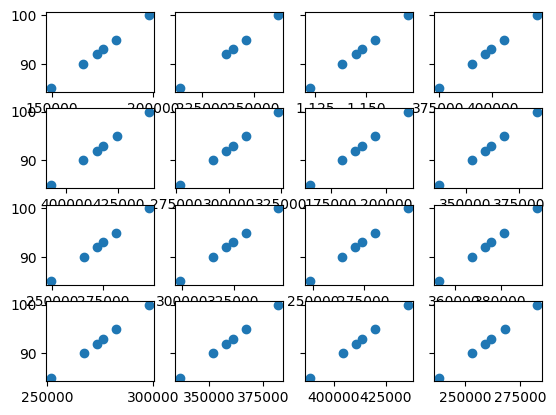

0.0003097146086168179
0.0003144623509679799
0.0003082925647703535
0.00032596773533745714
0.0003192006839566917
0.00032021073937595567
0.0003402841278983901
0.00032676497428816344
0.00031286896107386383
0.00031592179649341174
0.00030743280137020116
0.0003495682282683456
0.00032510244224500393
0.00033277800941035964
0.00032042089458995157
nan
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


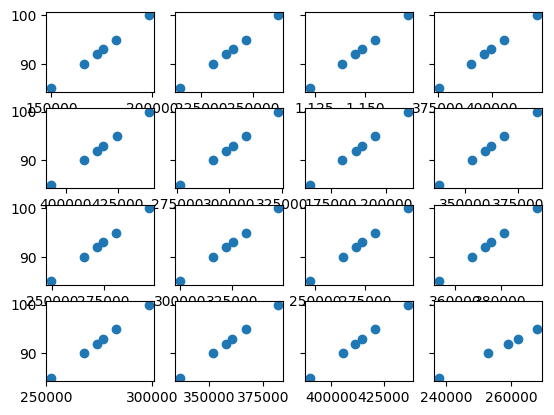

0.00031032420625285296
0.00031522718901113184
0.00030899208905391877
0.0003288608161582269
0.0003186108552993469
0.00032012234642086454
0.0003404178746191647
0.00032752163210864326
0.00031372494982316026
0.00031755261725475563
0.0003074379268786567
0.00035095678045169934
0.00032535618631531637
0.00033239163988363346
0.00032038074727828053
0.0003322699851815271
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


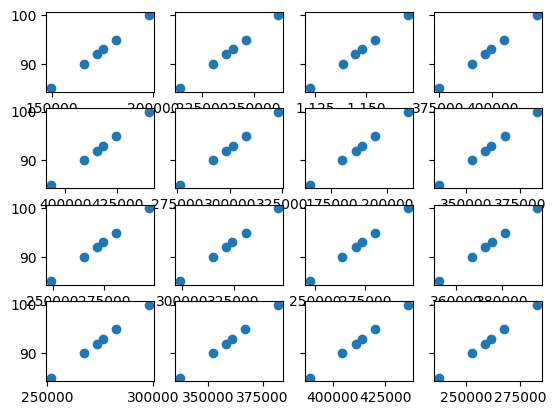

In [85]:
cal1=get_cal('240802_controls_and_melt_films')
cal2=get_cal('241003_controls_all_aluminum')
cal4=get_cal('with_watchdogandpi_castfilms_240625')


cals=[cal4,cal1,cal2]

In [86]:
times=[]
for k in range(1,3):
    print(cals[k][0])
    time=np.array(cals[0][0])-np.array(cals[k][0])
    print(time)
    times+=[time]
#print(times)
times=np.array(times)
times=np.reshape(times,(1,-1))

[0.0003107648111458279, nan, 0.00030919312803106267, 0.0003278457072688662, 0.0003177578311610705, 0.00031999893103429344, 0.00033941445894779347, 0.0003277165586459079, 0.00031312810087299895, 0.00031558265078743535, 0.00030682671568939534, 0.0003518712900211356, 0.00032572082376213467, 0.0003329582102156552, 0.0003197143110441177, 0.0003331379696863837]
[-4.40604893e-07             nan -2.01038977e-07  1.01510889e-06
  8.53024138e-07  1.23415387e-07  1.00341567e-06 -1.94926537e-07
  5.96848950e-07  1.96996647e-06  6.11211189e-07 -9.14509569e-07
 -3.64637447e-07 -5.66570332e-07  6.66436234e-07 -8.67984505e-07]
[0.0003097146086168179, 0.0003144623509679799, 0.0003082925647703535, 0.00032596773533745714, 0.0003192006839566917, 0.00032021073937595567, 0.0003402841278983901, 0.00032676497428816344, 0.00031286896107386383, 0.00031592179649341174, 0.00030743280137020116, 0.0003495682282683456, 0.00032510244224500393, 0.00033277800941035964, 0.00032042089458995157, nan]
[ 6.09597636e-07  7.6

0.10982650083000642


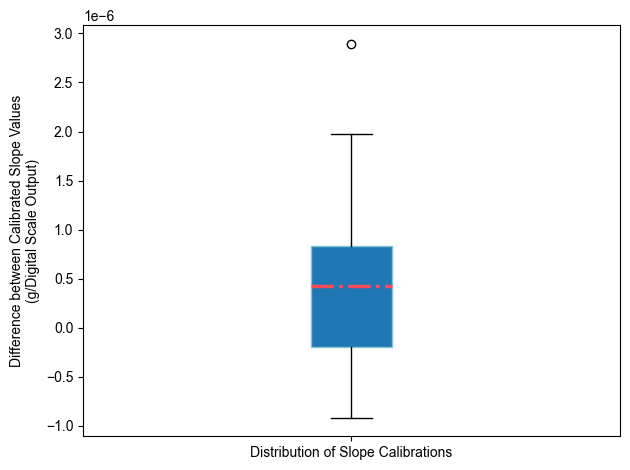

In [117]:
purples=['#8b73d5','#735aac','#393952']
blues=['#b4e6f6','#83c5d5','#4194a4']
gray='#7b8bb4'
pinks=['#ff94ac','#ff4a5a','#c51020']
times=np.reshape(times,-1)
arr_cleaned = times[~np.isnan(times)]
plt.rcParams["font.family"] = "Arial"
#print(arr_cleaned)
fig,ax = plt.subplots(layout='tight')
boxprops=dict(color=blues[1])
medianprops = dict(linestyle='-.', linewidth=2.5, color=pinks[1])
plot=ax.boxplot(arr_cleaned,patch_artist=True,boxprops=boxprops,medianprops=medianprops)

errs=np.array([cals[0][2],cals[1][2],cals[2][2]])
errs=np.reshape(errs,-1)
errs_cleaned=errs[~np.isnan(errs)]
print(np.mean(errs_cleaned))

ax.set_xticks([1],['Distribution of Slope Calibrations'],size=10)
ax.set_ylabel('Difference between Calibrated Slope Values\n(g/Digital Scale Output)',size=10)
plt.savefig('./scale_calibration_distribution'+'.pdf',dpi=300)
#ax.set_xlim([0.75,1.25])
#ax2=ax.twinx()
#ax2.boxplot(errs_cleaned,positions=[2])
#ax.set_ylim([-0.08,0.08])

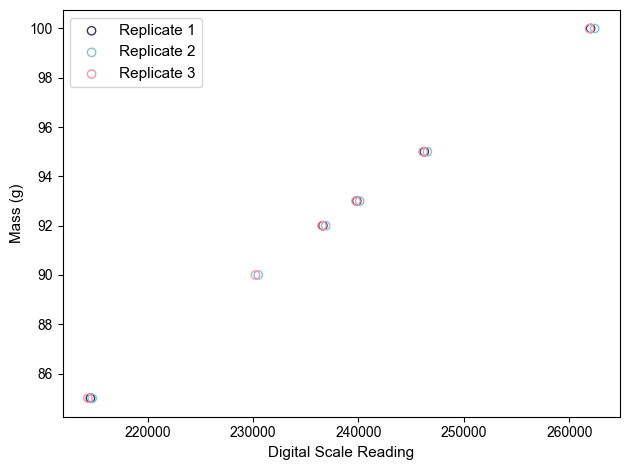

In [124]:
fig, ax =plt.subplots(layout='tight')
cal_masses=np.array([85,90,92,93,95,100])

calibration1=pd.read_csv('./'+'240802_controls_and_melt_films'+'calibration.csv',header=0)
calibration2=pd.read_csv('./'+'241003_controls_all_aluminum'+'calibration.csv',header=0)
calibration3=pd.read_csv('./'+'with_watchdogandpi_castfilms_240625'+'calibration.csv',header=0)
i=1
ax.scatter(calibration1.iloc[i,1:].values.tolist(),cal_masses,marker='o',facecolor='None',edgecolor=purples[2],label='Replicate 1')
ax.scatter(calibration2.iloc[i,1:].values.tolist(),cal_masses,marker='o',facecolor='None',edgecolor=blues[1],label='Replicate 2')
ax.scatter(calibration3.iloc[i,1:].values.tolist(),cal_masses,marker='o',facecolor='None',edgecolor=pinks[0],label='Replicate 3')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Digital Scale Reading',size=11)
ax.set_ylabel('Mass (g)',size=11)
ax.legend(fontsize=11)
plt.savefig('./scale1_calibration_consistency'+'.pdf',dpi=300)


[-2.09285321e-04  5.89683850e-03  1.39926635e-07]
[-1.81146691e-04 -1.00345614e-02  1.25188942e-07]
[-1.80489553e-04 -4.16217712e-03  1.15843833e-07]
[1.73210052e-04 5.18055835e-03 1.27805175e-07]
[[ 2.72413520e+01 -7.67554323e+02 -1.82133687e-02]
 [ 2.35787237e+01  1.30613565e+03 -1.62950560e-02]
 [ 2.34931882e+01  5.41764378e+02 -1.50786621e-02]
 [ 2.25456614e+01  6.74320649e+02  1.66355946e-02]]
[[ 3.93879648e-01 -8.33880464e+01 -2.41756650e-03]
 [ 4.21340663e-01 -7.14692436e+02 -4.13924308e-03]
 [ 3.98463622e-01  8.24487038e+02 -4.76830251e-03]
 [ 3.76525298e-01 -4.18269466e+02 -2.42558802e-03]]
nylon [1.26607921 6.28009211] imide [0.04270463 0.96085409] cell [2.882e+00 2.775e+04] pet [0.08609339 0.40514535]
[0.1876900222001111, 2.7812657366558136, 24.214731337458137, 0.39755230774941763]
[0.11318623068687557, 0.17122168148344064, 1.793833682812272, 0.01598702513671989]


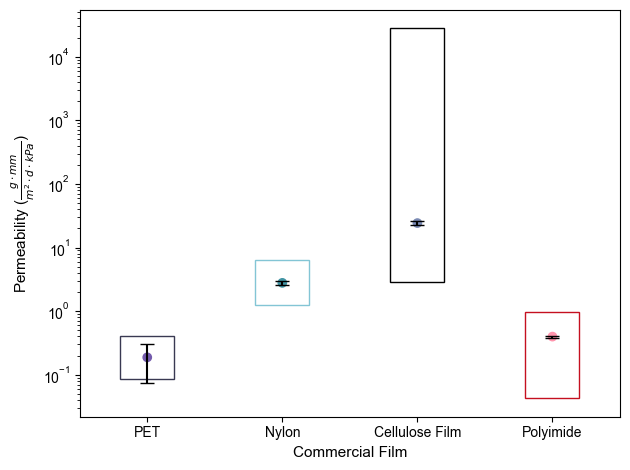

In [246]:
nylons_batch1=[] #this is nylon 66
pet_batch1=[]
polyimide1=[]
cellulose1=[]

for i in range(4):
    nylon=np.load('./with_watchdogandmac_edits_2/scale'+str(i)+'-Nylon_'+str(i+1)+'-fit.npy')
    pet=np.load('./with_watchdogandmac_edits_2/scale'+str(i+12)+'-PET_'+str(i+1)+'-fit.npy')
    imide=np.load('./with_watchdogandmac_edits_2/scale'+str(i+8)+'-Polyimide_'+str(i+1)+'-fit.npy')
    cellulose=np.load('./with_watchdogandpi_cellulose_101223/scale'+str(i)+'-Cellulose_'+str(i+1)+'-fit.npy')
    nylons_batch1+=[nylon]
    pet_batch1+=[pet]
    polyimide1+=[imide]
    print(cellulose)
    cellulose1+=[cellulose]

nylons_batch1=np.array(nylons_batch1)/10*60*24*(100**2)*0.002*25.4/(0.5*2.81)*(-1) #g/mincm^2*60min/hr*24hr/day*100**2*in*mm/in/kPa
pet_batch1=np.array(pet_batch1)/10*60*24*(100**2)*0.03/(0.5*2.81)*(-1)
polyimide1=np.array(polyimide1)/10*60*24*(100**2)*0.001*25.4/(0.5*2.81)*(-1)
cellulose1=np.array(cellulose1)/10*60*24*(100**2)*0.005*25.4/(0.5*2.81)*(-1)
cellulose1[3:4,:]=cellulose1[3:4,:]*(-1)
print(cellulose1)
print(polyimide1)
lit_nylon=np.array([7.5/(0.9*6.582),15/(0.85*2.81)]) #g*mm/m^2*day*atm/101.325kPa
lit_imide=np.array([0.06,1.35])/(0.5*2.81)
lit_cell=np.array([2.882,27750])
lit_pet=np.array([0.51,2.4])/(0.9*6.582)

print('nylon',lit_nylon,'imide',lit_imide,'cell',lit_cell,'pet',lit_pet)
fig,ax=plt.subplots(layout='tight')

ax.errorbar([1,2,3,4],[np.mean(pet_batch1[:,0]),np.mean(nylons_batch1[:,0]),np.mean(cellulose1[:,0]),np.mean(polyimide1[:,0])],yerr=[np.std(pet_batch1[:,0]),np.std(nylons_batch1[:,0]),np.std(cellulose1[:,0]),np.std(polyimide1[:,0])],xerr=None,fmt='none',capsize=5,color='black')
print([np.mean(pet_batch1[:,0]),np.mean(nylons_batch1[:,0]),np.mean(cellulose1[:,0]),np.mean(polyimide1[:,0])])
print([np.std(pet_batch1[:,0]),np.std(nylons_batch1[:,0]),np.std(cellulose1[:,0]),np.std(polyimide1[:,0])])
ax.scatter([1,2,3,4],[np.mean(pet_batch1[:,0]),np.mean(nylons_batch1[:,0]),np.mean(cellulose1[:,0]),np.mean(polyimide1[:,0])],color=[purples[1],blues[2],gray,pinks[0]])
ax.set_xticks([1,2,3,4],['PET','Nylon','Cellulose Film','Polyimide'])
rect = patches.Rectangle((0.8, lit_pet[0]), 0.4, lit_pet[1]-lit_pet[0], linewidth=1, edgecolor=purples[2], facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((1.8, lit_nylon[0]), 0.4, lit_nylon[1]-lit_nylon[0], linewidth=1, edgecolor=blues[1], facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((2.8, lit_cell[0]), 0.4, lit_cell[1]-lit_cell[0], linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(rect)
rect = patches.Rectangle((3.8, lit_imide[0]), 0.4, lit_imide[1]-lit_imide[0], linewidth=1, edgecolor=pinks[2], facecolor='none')
ax.add_patch(rect)
ax.set_yscale('log')
ax.set_xlabel('Commercial Film',size=11)
ax.set_ylabel(r'Permeability ($\frac{g\cdot mm}{m^2\cdot d\cdot kPa}$)',size=11)
ax.set_xlim([0.5,4.5])
ax.tick_params(axis='both', which='major', labelsize=10)
plt.savefig('./comparison_literature'+'.pdf',dpi=300)

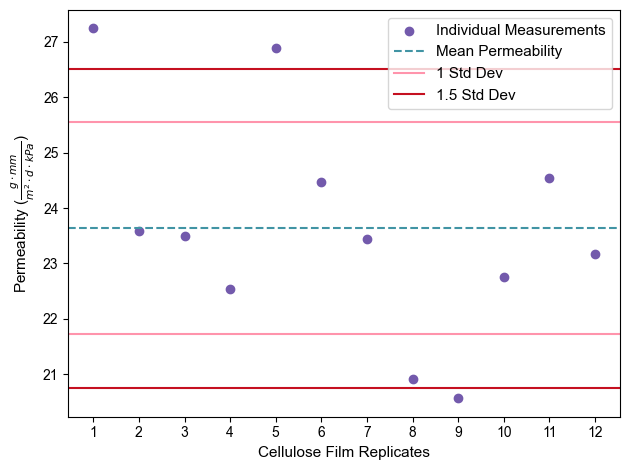

In [232]:
#cellulose run validation
scales=[0,1,2,3,8,9,10,11,12,13,14,15]
all_cellulose=[]
for k in scales:
    mult=-1
    if k==3:
        mult=1
    else:
        mult=-1
    cellulose=np.load('./with_watchdogandpi_cellulose_101223/scale'+str(k)+'-Cellulose_'+str(k+1)+'-fit.npy')*mult
    all_cellulose+=[cellulose]
all_cellulose=np.array(all_cellulose)/10*60*24*(100**2)*0.005*25.4/(0.5*2.81)
fig, ax=plt.subplots(layout='tight')
xs=np.arange(len(scales))
ax.scatter(xs,all_cellulose[:,0],color=purples[1],label='Individual Measurements')
ax.axhline(y=np.mean(all_cellulose[:,0]),color=blues[2],linestyle='--',label='Mean Permeability')
ax.axhline(y=np.mean(all_cellulose[:,0])-np.std(all_cellulose[:,0]),color=pinks[0],linestyle='-',label='1 Std Dev')
ax.axhline(y=np.mean(all_cellulose[:,0])+np.std(all_cellulose[:,0]),color=pinks[0],linestyle='-')
ax.axhline(y=np.mean(all_cellulose[:,0])-np.std(all_cellulose[:,0])*1.5,color=pinks[2],linestyle='-',label='1.5 Std Dev')
ax.axhline(y=np.mean(all_cellulose[:,0])+np.std(all_cellulose[:,0])*1.5,color=pinks[2],linestyle='-')
#ax.errorbar(xs,all_cellulose[:,0],yerr=abs(all_cellulose[:,2]),xerr=None,fmt='none',capsize=5,color='black')
ax.set_xlabel('Cellulose Film Replicates',size=11)
ax.set_xticks(xs,np.arange(1,len(xs)+1))
ax.set_ylabel(r'Permeability ($\frac{g\cdot mm}{m^2\cdot d\cdot kPa}$)',size=11)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend(fontsize=11)
plt.savefig('./consistency_eval_cellulose'+'.pdf',dpi=300)

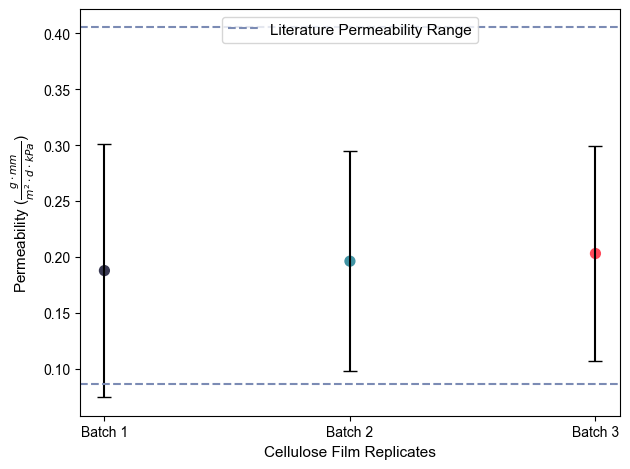

In [244]:
#pet batch to batch consistency
pet_batch1=[]
pet_batch2=[]
pet_batch3=[]

for i in range(4):
    pet=np.load('./with_watchdogandmac_edits_2/scale'+str(i+12)+'-PET_'+str(i+1)+'-fit.npy')
    pet2=np.load('./240802_controls_and_melt_films/scale'+str(i+4)+'-PET_'+str(i+1)+'-fit.npy')
    pet3=np.load('./with_watchdogandpi_controlfilms_240625/scale'+str(i+4)+'-PET_'+str(i+1)+'-fit.npy')
    pet_batch1+=[pet*-1]
    pet_batch2+=[pet2*-1]
    pet_batch3+=[pet3*-1]
fig,ax=plt.subplots(layout='tight')
pet_batch1=np.array(pet_batch1)/10*60*24*(100**2)*0.03/(0.5*2.81)
pet_batch2=np.array(pet_batch2)/10*60*24*(100**2)*0.03/(0.5*2.81)
pet_batch3=np.array(pet_batch3)/10*60*24*(100**2)*0.03/(0.5*2.81)
ax.scatter([1,2,3],[np.mean(pet_batch1[:,0]),np.mean(pet_batch2[:,0]),np.mean(pet_batch3[:,0])],color=[purples[2],blues[2],pinks[1]],s=50)
ax.errorbar([1,2,3],[np.mean(pet_batch1[:,0]),np.mean(pet_batch2[:,0]),np.mean(pet_batch3[:,0])],yerr=[np.std(pet_batch1[:,0]),np.std(pet_batch2[:,0]),np.std(pet_batch3[:,0])],xerr=None,fmt='none',capsize=5,color='black')

ax.set_ylabel(r'Permeability ($\frac{g\cdot mm}{m^2\cdot d\cdot kPa}$)',size=11)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Cellulose Film Replicates',size=11)
ax.set_xticks([1,2,3],['Batch 1','Batch 2','Batch 3'])
lit_pet=np.array([0.51,2.4])/(0.9*6.582)
ax.axhline(y=lit_pet[0],color=gray,linestyle='--',label='Literature Permeability Range')
ax.axhline(y=lit_pet[1],color=gray,linestyle='--')
ax.legend(fontsize=11,loc='upper center')
plt.savefig('./batch_comparison_PET'+'.pdf',dpi=300)